# Spiking Neural Network

The class Spiking_Neural_network consists of __produce_spike()__ which produces spike for ne+ni number of neurons with random input current I and randomly varying parameters a,b,c,d

The __set_parameters()__ allows us to set all the parameters to tweak the network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
class Spiking_Neural_Network:
    dyn_var = {"IB":{'a':0.02,'b':0.2,'c':-55,'d':4,'v':-65},
               "RS":{'a':0.02,'b':0.2,'c':-65,'d':8,'v':-65},
               "LTS":{'a':0.02,'b':0.25,'c':-65,'d':2,'v':-65},
               "TC":{'a':0.02,'b':0.25,'c':-65,'d':0.05,'v':-65},
               "CH":{'a':0.02,'b':0.2,'c':-50,'d':2,'v':-65},
               "RZ":{'a':0.1,'b':0.3,'c':-65,'d':2,'v':-65},
               "FS":{'a':0.1,'b':0.2,'c':-65,'d':2,'v':-65}
              }
        
    def __init__(self,spike_type="RS"):
        if spike_type in self.dyn_var:
            self.a_fill = self.dyn_var[spike_type]['a']
            self.b_fill = self.dyn_var[spike_type]['b']
            self.c_fill = self.dyn_var[spike_type]['c']
            self.d_fill = self.dyn_var[spike_type]['d']
            
            self.v_fill = self.dyn_var[spike_type]['v']
            
            self.ne=800
            self.ni=200
                       
            self.duration = 1000 # milliseconds
        else:
            raise Exception('Please enter a valid spike_type')
            
    def set_parameters(self,a=None,b=None,c=None,d=None,v=None,duration=None,ne=None,ni=None):
        
        if a is None:
            a = self.a_fill
        if b is None:
            b = self.b_fill
        if c is None:
            c = self.c_fill
        if d is None:
            d = self.d_fill
        if v is None:
            v = self.v_fill
        if duration is None:
            duration = self.duration
        if ne is None:
            ne = self.ne
        if ni is None:
            ni = self.ni
        
        self.a_fill = a
        self.b_fill = b
        self.c_fill = c
        self.d_fill = d
        self.v_fill = v
        #self.I_fill = I
        self.ne=ne
        self.ni=ni
        self.duration = duration
        
    def produce_spike(self):
        ne = self.ne
        ni = self.ni
        re = np.random.rand(ne,1)
        ri = np.random.rand(ni,1)
        a=np.concatenate((self.a_fill*np.ones([ne,1]),self.a_fill+0.08*ri),axis=0)
        b=np.concatenate((self.b_fill*np.ones([ne,1]),0.25-0.05*ri),axis=0)
        c=np.concatenate((self.c_fill+15*np.square(re),self.c_fill*np.ones([ni,1])),axis=0)
        d=np.concatenate((8-self.d_fill*np.square(re),2*np.ones([ni,1])),axis=0)
        s=np.concatenate((0.5*np.random.rand(ne+ni,ne),-np.random.rand(ne+ni,ni)),axis=1)
        
        v= self.v_fill*np.ones([ne+ni,1])
        v_trail = np.array([]).reshape([0,2])
        
        u = np.multiply(b,v)
        firings=np.array([]).reshape([0,2])
        for t in range(1,self.duration):
            #V_trail.append([t,v])
            v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
            I = np.concatenate((5*np.random.randn(ne,1),2*np.random.randn(ni,1)),axis=0)
            #print("I is ",I)
            fired = np.expand_dims(np.where(v>=30)[0],axis=1)
            firings=np.concatenate((firings,np.concatenate((t+0*fired,fired),axis=1)),axis=0)
            v[fired] = c[fired]
            u[fired] = u[fired] + d[fired]
            I = I + np.sum(s[:,fired],axis=1)
            #print("I2 is ",I)
            v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)
            v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)
            #print("V is ",v)
            u=u+np.multiply(a,(np.multiply(b,v)-u))
            #print("u is ",u)
        return firings,v_trail


(29473, 2)


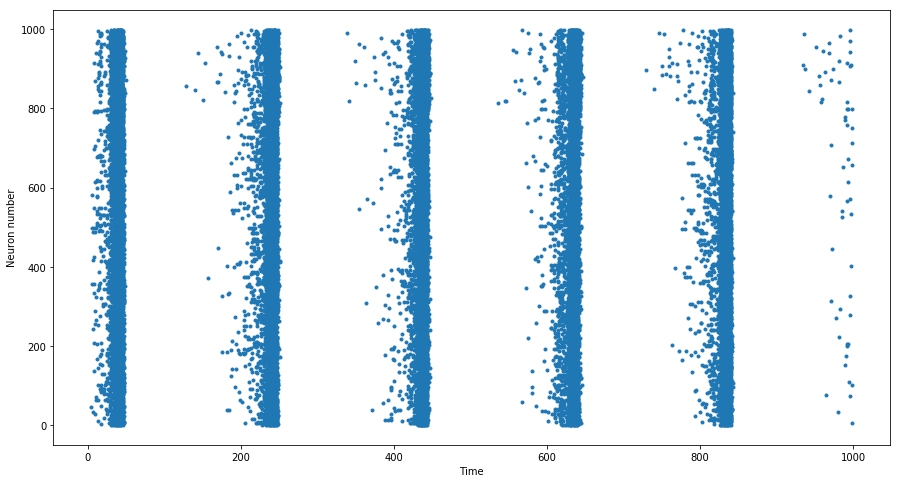

In [9]:
network = Spiking_Neural_Network("IB")
network.set_parameters(ne=800,ni=200,duration=1000)
firings,v_trail = network.produce_spike()
print(firings.shape)
plt.figure(figsize=(15,8))
plt.xlabel('Time')
plt.ylabel('Neuron number')
plt.plot(firings[:,0],firings[:,1],'.')
plt.show()

### We can see that the group of neurons are brought to synchrony by random variations in the parameters and the input

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Let us look at a how single neuron train looks like

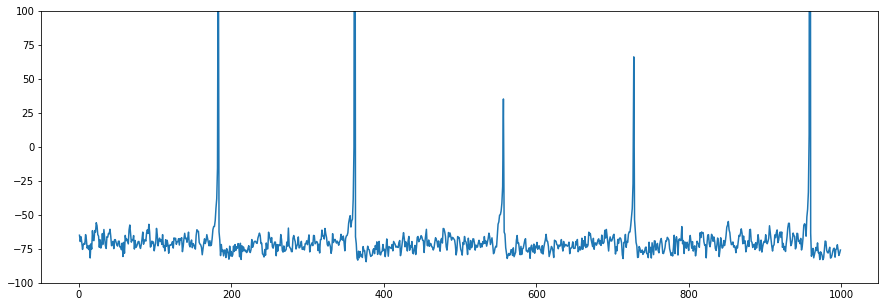

In [14]:
network = Spiking_Neural_Network("IB")
network.set_parameters(ne=1,ni=0,duration=1000)
_,v_trail = network.produce_spike()
#print(v_trail)
plt.figure(figsize=(15,5))
  # return the current ylim
plt.ylim((-100, 100))
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()